In [12]:
#1. Domain Knowledge
#2. Interaction Features
#3. Sparse Classes
#4. Dummy Variables
#5. Remove Unused

In [13]:
from __future__ import print_function
print('print function ready to serve')

print function ready to serve


In [14]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [15]:
df=pd.read_csv('cleaned_df.csv')

In [16]:
df

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,146,10,23,27,86,9,60,52,28,15,86,168,58,8.0,3,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,Missing,0.0,159,13,36,17,92,12,66,50,28,36,88,176,61,7.0,3,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36,25,91,266,92,9.0,3,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,51,8,6,2,40,18,32,41,36,49,77,188,65,6.0,3,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,119,10,26,25,183,13,70,36,57,13,83,147,51,6.0,3,2007


In [17]:
#create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.beds  == 2)  &  (df.baths == 2)).astype(int)

In [18]:
#display percent of rows where two_and two == 1
df.two_and_two.mean()

0.09458023379383634

In [19]:
#Create indicator feature for transaction year 2010 &2013
df['during_recesssion'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)
df

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recesssion
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,2013,0,1
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,2006,0,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,2012,0,1
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,2005,0,0
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,2002,0,0
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,146,10,23,27,86,9,60,52,28,15,86,168,58,8.0,3,2004,0,0
6,240000,1,1,642,1944,0,Single-Family,Brick,Missing,0.0,159,13,36,17,92,12,66,50,28,36,88,176,61,7.0,3,2011,0,1
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36,25,91,266,92,9.0,3,2005,0,0
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,51,8,6,2,40,18,32,41,36,49,77,188,65,6.0,3,2013,0,1
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,119,10,26,25,183,13,70,36,57,13,83,147,51,6.0,3,2007,0,0


In [20]:
df.during_recesssion.mean()

0.2635494155154091

# 3.2 Interaction Features

In [21]:
#Create a property age feature
df['property_age'] = df.tx_year - df.year_built
df.sort_values('property_age')

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recesssion,property_age
405,280000,3,2,1040,2013,14810,Single-Family,Siding (Alum/Vinyl),Missing,1.0,28,5,2,0,14,1,22,6,40,47,5,211,59,3.5,2,2005,0,0,-8
1827,365000,5,4,5654,2015,10175,Single-Family,Brick,Composition Shingle,1.0,36,5,3,2,38,1,19,4,44,72,42,799,243,4.0,3,2007,0,0,-8
1781,350000,5,4,4252,2010,22215,Single-Family,Other,Composition Shingle,1.0,47,7,2,5,25,1,17,7,33,46,63,739,225,4.0,3,2003,0,0,-7
1873,370000,5,5,7578,2008,87120,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,0,0,0,0,1,0,0,2,47,92,84,1045,318,9.0,3,2004,0,0,-4
1863,320000,5,5,5984,2015,16988,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,42,5,4,7,35,3,30,11,37,70,62,1057,322,5.0,3,2013,0,1,-2
1877,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46,76,87,1250,381,10.0,3,2002,0,0,-2
1555,300000,4,4,5800,2002,22215,Single-Family,Brick,Composition Shingle,1.0,1,0,0,0,2,0,1,2,47,81,79,1799,548,6.0,3,2000,0,0,-2
1571,540000,4,6,4418,2007,11325,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,70,6,9,14,122,2,43,17,29,75,45,868,264,8.0,3,2005,0,0,-2
1865,231000,5,5,6346,2011,10890,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,45,7,2,4,25,1,18,7,33,46,63,799,243,4.0,3,2010,0,1,-1
1139,294996,4,2,3711,2003,7405,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,25,2,1,3,19,2,17,10,32,78,57,413,117,6.0,3,2002,0,0,-1


In [22]:
#Should not be less than 0
print(df.property_age.min())

-8


In [23]:
#number of observations with property_age <0
print(sum(df.property_age < 0))
df

19


,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recesssion,property_age
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,2013,0,1,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,2006,0,0,41
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,2012,0,1,49
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,2005,0,0,5
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,2002,0,0,10
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,146,10,23,27,86,9,60,52,28,15,86,168,58,8.0,3,2004,0,0,57
6,240000,1,1,642,1944,0,Single-Family,Brick,Missing,0.0,159,13,36,17,92,12,66,50,28,36,88,176,61,7.0,3,2011,0,1,67
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36,25,91,266,92,9.0,3,2005,0,0,5
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,51,8,6,2,40,18,32,41,36,49,77,188,65,6.0,3,2013,0,1,30
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,119,10,26,25,183,13,70,36,57,13,83,147,51,6.0,3,2007,0,0,42


In [24]:
#Remove property_age less than 0
df = df[df.property_age  >=  0]
print(len(df))

1863


In [25]:
#Create a school feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school

In [26]:
#Display median school score
df.school_score.median()

18.0

# 3.3 Sparse Classes

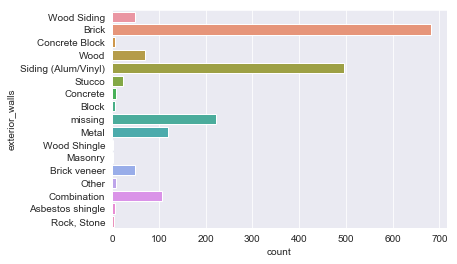

In [27]:
#Bar plot for exterior walls
sns.countplot(y='exterior_walls', data=df)

In [28]:
# Group Wood Siding', 'Wood Shingle' with 'Wood
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

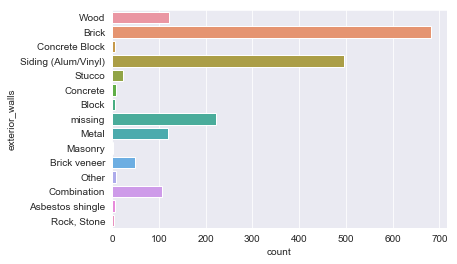

In [29]:
sns.countplot(y='exterior_walls', data=df)

In [30]:
#List of classes to group
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle', 'Concrete', 'Block', 'Rock, Stone']

#Group other classes into 'other'
df.exterior_walls.replace(other_exterior_walls, 'other', inplace=True)

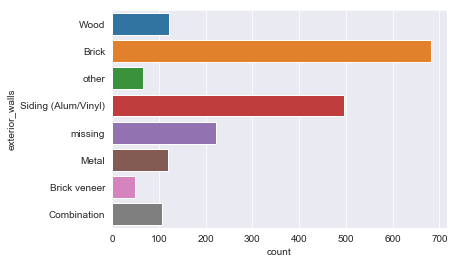

In [31]:
sns.countplot(y='exterior_walls', data=df)

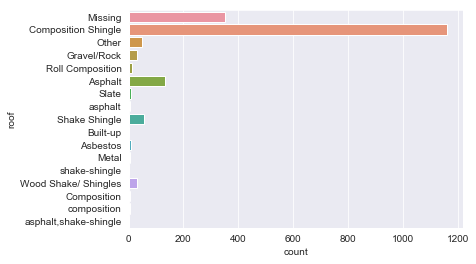

In [32]:
#Bar Plot for roof
sns.countplot(y='roof', data=df)

In [33]:
#Group 'Composition', 'Wood Shake/ Shingles',  with 'Composition Shingle',
df.roof.replace(['Composition', 'Wood Shake/ Shingles', ], 'Composition Shingle', inplace=True)

In [34]:
#List of classes to group
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal', 'asphalt', 'composition', 'asphalt,shake-shingle', 'shake-shingle']
df.roof.replace(other_roofs, 'other', inplace=True)

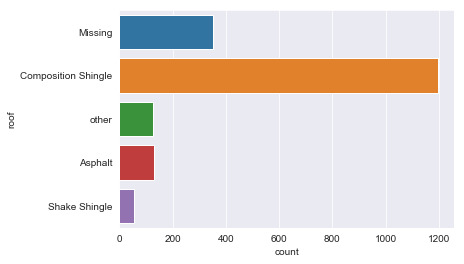

In [35]:
sns.countplot(y='roof', data=df)

# 3.4 Dummy Variables

In [36]:
#create new dataframe with dummy variables
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'] )
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recesssion,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,exterior_walls_other,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Shake Shingle,roof_other,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,2013,0,1,0,27.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,2012,0,1,49,24.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,2005,0,0,5,27.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# 3.5 Remove Unused

In [37]:
#Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year' , 'year_built'], axis=1)

In [38]:
df.head()

,tx_price,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recesssion,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,exterior_walls_other,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Shake Shingle,roof_other,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,0,0.0,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,0,1,0,27.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,216500,1,1,612,0,1.0,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,0,0.0,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,0,1,49,24.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,379900,1,1,618,33541,0.0,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,0,0,5,27.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,340000,1,1,634,0,0.0,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [40]:
#Analytical Base Table
df.to_csv('analytical_base_table.csv', index=None)